In [1]:
%run _bootstrap.py
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
# 1. Load 30m BTC/USDT bars (will hit cache or download)
from src.data_loader import get_asset_df
df = get_asset_df("BTC/USDT", timeframe="1min")


In [9]:
# 2. Compute features
from src.features import add_log_return, add_rolling_stats, add_zscore

# a) Log returns
df = add_log_return(df)

# b) 2-day rolling stats (96 bars at 30m)
df = add_rolling_stats(df, lookback=96)

# c) Z-score of last return
df = add_zscore(df, lookback=96)


In [10]:
display(
    df[[
        "close",
        "log_return",
        "log_return_mean_96",
        "log_return_std_96",
        "zscore",
    ]].tail(10)
)


,close,log_return,log_return_mean_96,log_return_std_96,zscore
timestamp,,,,,
2025-07-19 12:03:00+00:00,118306.00,-1.779126e-04,-9.332724e-07,0.000216,-0.818269
2025-07-19 12:04:00+00:00,118316.53,8.900251e-05,-6.162845e-09,0.000216,0.411168
2025-07-19 12:05:00+00:00,118275.26,-3.488709e-04,-4.642970e-06,0.000219,-1.570976
2025-07-19 12:06:00+00:00,118260.01,-1.289448e-04,-5.987025e-06,0.000219,-0.560224
2025-07-19 12:07:00+00:00,118250.77,-7.813597e-05,-6.800942e-06,0.000220,-0.324840
2025-07-19 12:08:00+00:00,118265.96,1.284476e-04,-5.462946e-06,0.000220,0.608604
2025-07-19 12:09:00+00:00,118278.00,1.017993e-04,-4.401657e-06,0.000220,0.482079
2025-07-19 12:10:00+00:00,118260.00,-1.521954e-04,-5.987906e-06,0.000221,-0.662149
2025-07-19 12:11:00+00:00,118261.98,1.674263e-05,-5.812623e-06,0.000221,0.102144


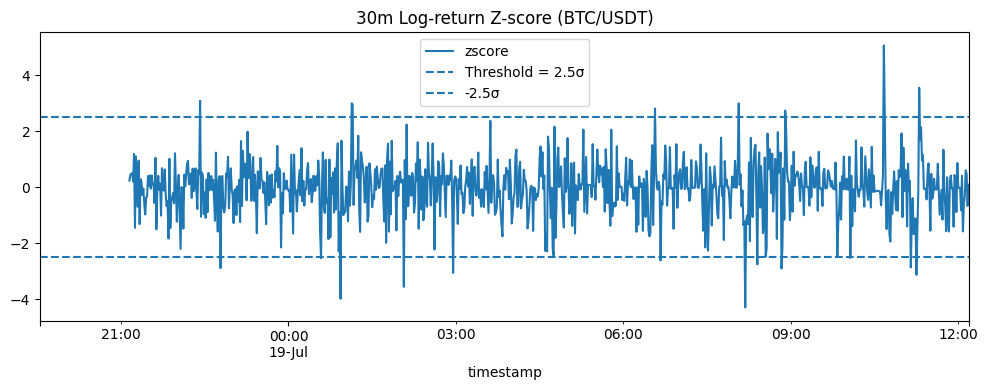

Z-score distribution: count    904.000000
mean      -0.019024
std        0.962054
min       -4.287810
25%       -0.542813
50%       -0.006257
75%        0.515930
max        5.072337
Name: zscore, dtype: float64
Count of |z| ≥ 2.5: 21


In [11]:
# 4. Quick plot of Z-score over time
plt.figure(figsize=(10, 4))
df["zscore"].plot(title="30m Log-return Z-score (BTC/USDT)")
plt.axhline(2.5, linestyle="--", label="Threshold = 2.5σ")
plt.axhline(-2.5, linestyle="--", label="-2.5σ")
plt.legend()
plt.tight_layout()
plt.show()

# 5. Summary stats
print("Z-score distribution:", df["zscore"].describe())
print("Count of |z| ≥ 2.5:", (df["zscore"].abs() >= 2.5).sum())